In [1]:
import numpy as np
import matplotlib.pylab as plt

/tmp/ipykernel_322263/1293255974.py:16: RuntimeWarning: overflow encountered in multiply
  Z = Z * Z + Z_C
/tmp/ipykernel_322263/1293255974.py:16: RuntimeWarning: invalid value encountered in multiply
  Z = Z * Z + Z_C


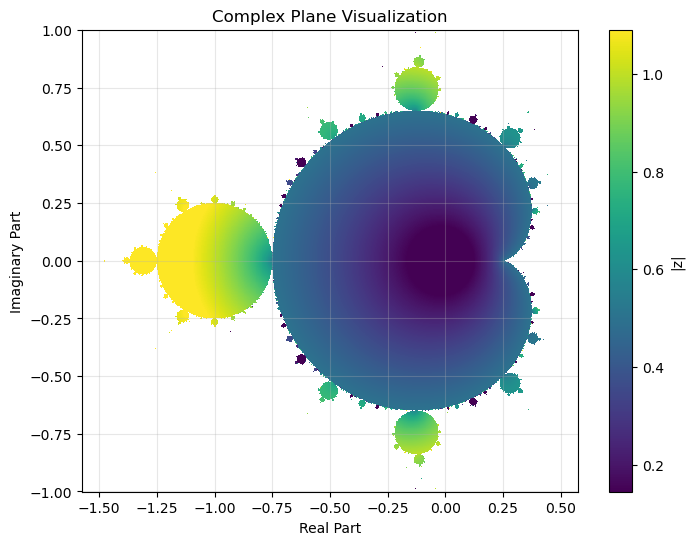

In [2]:
# Create a meshgrid of x and y values
x_min, x_max = -1.5, 0.5
y_min, y_max = -1, 1
n_points = 1000

x = np.linspace(x_min, x_max, n_points)
y = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x, y)

# Convert to complex numbers
Z_C = X + 1j * Y

Z = Z_C
# perform Mendeborot iteration
for i in range(1000):
    Z = Z * Z + Z_C
    
log_abs_Z = np.log(np.abs(Z))
q5, q95 = np.quantile(log_abs_Z[~np.isnan(log_abs_Z)], [0.05, 0.95])
# plt.figure(figsize=(8, 6))
# plt.pcolormesh(X, Y, log_abs_Z, shading='auto', cmap='viridis', vmin=q5, vmax=q95)
abs_Z = np.abs(Z)
q5, q95 = np.quantile(abs_Z[~np.isnan(abs_Z)], [0.05, 0.95])
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, abs_Z, shading='auto', cmap='viridis', vmin=q5, vmax=q95)
plt.colorbar(label='|z|')
plt.title('Complex Plane Visualization')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.axis('equal')
plt.grid(True, alpha=0.3)


/tmp/ipykernel_322263/3738146457.py:17: RuntimeWarning: overflow encountered in multiply
  Z = Z * Z + Z_C
/tmp/ipykernel_322263/3738146457.py:17: RuntimeWarning: invalid value encountered in multiply
  Z = Z * Z + Z_C


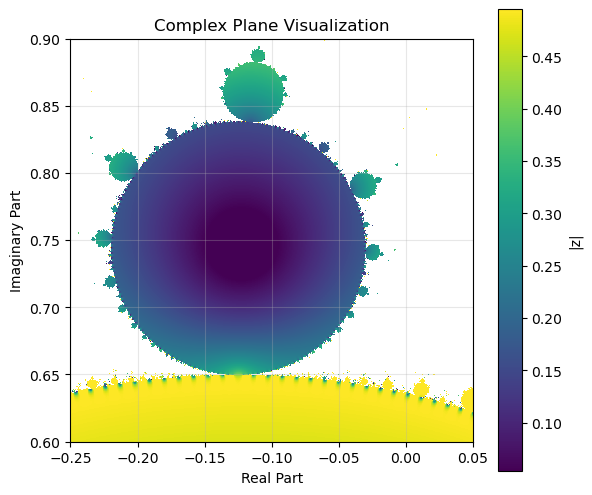

In [3]:
# Create a meshgrid of x and y values
x_min, x_max = -0.25, 0.05
y_min, y_max = 0.6, 0.9
n_points = 1000
n_iter = 500

x = np.linspace(x_min, x_max, n_points)
y = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x, y)
# Convert to complex numbers
Z_C = X + 1j * Y

# initialize Z
Z = Z_C
# perform Mendeborot iteration
for i in range(n_iter):
    Z = Z * Z + Z_C
    
plot_log = False
plt.figure(figsize=(6.5, 6))
if plot_log:
    log_abs_Z = np.log(np.abs(Z))
    q5, q95 = np.quantile(log_abs_Z[~np.isnan(log_abs_Z)], [0.05, 0.95])
    plt.pcolormesh(X, Y, log_abs_Z, shading='auto', cmap='viridis', vmin=q5, vmax=q95)
    plt.colorbar(label='log|z|')
else:
    abs_Z = np.abs(Z)
    q5, q95 = np.quantile(abs_Z[~np.isnan(abs_Z)], [0.05, 0.95])
    plt.pcolormesh(X, Y, abs_Z, shading='auto', cmap='viridis', vmin=q5, vmax=q95)
    plt.colorbar(label='|z|')
plt.title('Complex Plane Visualization')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.axis('equal')
plt.axis('image')
plt.grid(True, alpha=0.3)


In [4]:
np.quantile(np.log(np.abs(Z))[~np.isnan(np.log(np.abs(Z)))], [0.05, 0.95])

array([-2.9249699 , -0.70283667])

/tmp/ipykernel_322263/942432918.py:39: RuntimeWarning: overflow encountered in multiply
  Z = Z * Z + Z_C
/tmp/ipykernel_322263/942432918.py:39: RuntimeWarning: invalid value encountered in multiply
  Z = Z * Z + Z_C


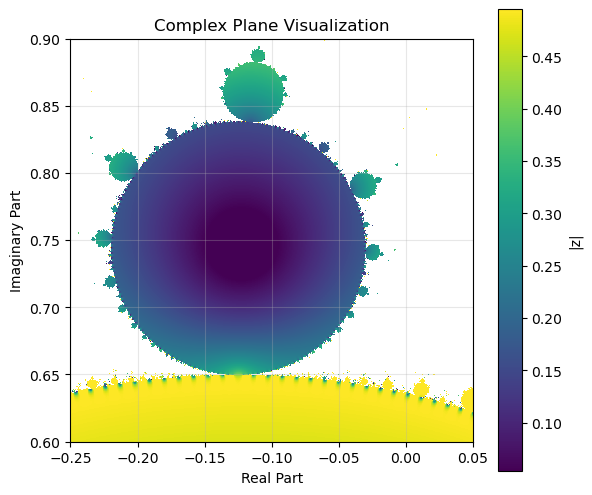

In [5]:
def plot_mandelbrot(x_lim=(-0.5, 0.5), y_lim=(-0.5, 0.5), 
                   n_points=1000, n_iter=500, plot_variable="abs", plot_contour=False, figsize=(6.5, 6)):
    """
    Generate and plot the Mandelbrot set in a specified region of the complex plane.
    
    Parameters:
    -----------
    x_min, x_max : float
        Range for the real part of the complex plane
    y_min, y_max : float
        Range for the imaginary part of the complex plane
    n_points : int
        Number of points in each dimension
    n_iter : int
        Number of iterations for the Mandelbrot calculation
    plot_log : bool
        Whether to plot the logarithm of the absolute values
    figsize : tuple
        Figure size for the plot
    
    Returns:
    --------
    Z : ndarray
        The final complex values after iteration
    """
    # Create a meshgrid of x and y values
    x_min, x_max = x_lim
    y_min, y_max = y_lim
    x = np.linspace(x_min, x_max, n_points)
    y = np.linspace(y_min, y_max, n_points)
    X, Y = np.meshgrid(x, y)
    # Convert to complex numbers
    Z_C = X + 1j * Y

    # initialize Z
    Z = Z_C
    # perform Mandelbrot iteration
    for i in range(n_iter):
        Z = Z * Z + Z_C
    
    fig = plt.figure(figsize=figsize)
    if plot_variable == "logabs":
        log_abs_Z = np.log(np.abs(Z))
        q5, q95 = np.quantile(log_abs_Z[~np.isnan(log_abs_Z)], [0.05, 0.95])
        plt.pcolormesh(X, Y, log_abs_Z, shading='auto', cmap='viridis', vmin=q5, vmax=q95)
        plt.colorbar(label='log|z|')
        if plot_contour:
            plt.contour(X, Y, log_abs_Z, levels=np.linspace(q5, q95, 10), colors='white', alpha=0.5, linewidths=0.5)
    elif plot_variable == "abs":
        abs_Z = np.abs(Z)
        q5, q95 = np.quantile(abs_Z[~np.isnan(abs_Z)], [0.05, 0.95])
        plt.pcolormesh(X, Y, abs_Z, shading='auto', cmap='viridis', vmin=q5, vmax=q95)
        # Add contour lines if requested
        if plot_contour:
            plt.contour(X, Y, abs_Z, levels=np.linspace(q5, q95, 10), colors='white', alpha=0.5, linewidths=0.5)
        plt.colorbar(label='|z|')
    elif plot_variable == "phase":
        phase_Z = np.angle(Z)
        # q5, q95 = np.quantile(phase_Z[~np.isnan(phase_Z)], [0.05, 0.95])
        plt.pcolormesh(X, Y, phase_Z, shading='auto', cmap='viridis')
        plt.colorbar(label='arg(z)')
        if plot_contour:
            plt.contour(X, Y, phase_Z, levels=10, colors='white', alpha=0.5, linewidths=0.5)
    elif plot_variable == "real":
        real_Z = np.real(Z)
        q5, q95 = np.quantile(real_Z[~np.isnan(real_Z)], [0.05, 0.95])
        plt.pcolormesh(X, Y, real_Z, shading='auto', cmap='viridis', vmin=q5, vmax=q95)
        plt.colorbar(label='Re(z)')
        if plot_contour:
            plt.contour(X, Y, real_Z, levels=np.linspace(q5, q95, 10), colors='white', alpha=0.5, linewidths=0.5)
    elif plot_variable == "imag":
        imag_Z = np.imag(Z)
        q5, q95 = np.quantile(imag_Z[~np.isnan(imag_Z)], [0.05, 0.95])
        plt.pcolormesh(X, Y, imag_Z, shading='auto', cmap='viridis', vmin=q5, vmax=q95)
        plt.colorbar(label='Im(z)')
        if plot_contour:
            plt.contour(X, Y, imag_Z, levels=np.linspace(q5, q95, 10), colors='white', alpha=0.5, linewidths=0.5)
    
    plt.title('Complex Plane Visualization')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.axis('equal')
    plt.axis('image')
    plt.grid(True, alpha=0.3)
    
    return Z, fig

# Example usage:
Z, fig = plot_mandelbrot(plot_variable="abs", x_lim=(-0.25, 0.05), y_lim=(0.6, 0.9))


/tmp/ipykernel_322263/942432918.py:39: RuntimeWarning: overflow encountered in multiply
  Z = Z * Z + Z_C
/tmp/ipykernel_322263/942432918.py:39: RuntimeWarning: invalid value encountered in multiply
  Z = Z * Z + Z_C


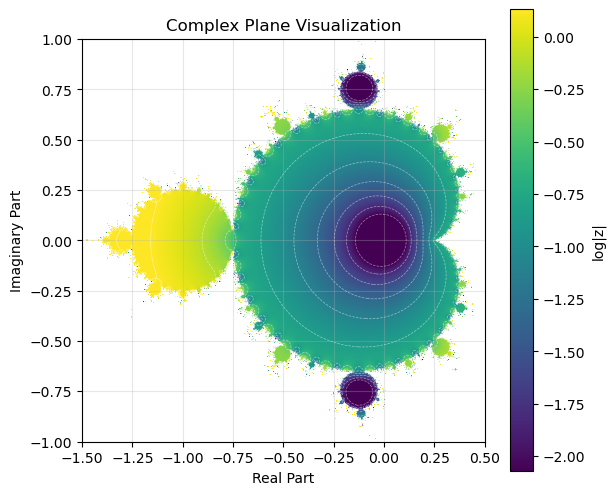

In [7]:
Z, fig = plot_mandelbrot(plot_variable="logabs", plot_contour=True, x_lim=(-1.5, 0.5), y_lim=(-1, 1), n_iter=50)

/tmp/ipykernel_307032/2920229466.py:39: RuntimeWarning: overflow encountered in multiply
  Z = Z * Z + Z_C
/tmp/ipykernel_307032/2920229466.py:39: RuntimeWarning: invalid value encountered in multiply
  Z = Z * Z + Z_C
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


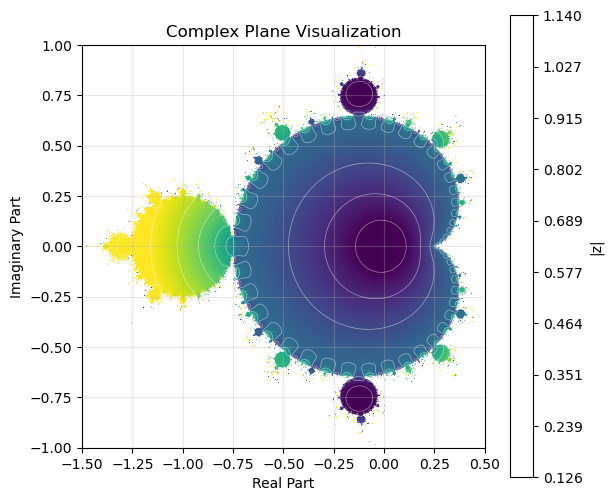

In [ ]:
Z, fig = plot_mandelbrot(plot_variable="abs", plot_contour=True, x_lim=(-1.5, 0.5), y_lim=(-1, 1), n_iter=50)

/tmp/ipykernel_307032/2920229466.py:39: RuntimeWarning: overflow encountered in multiply
  Z = Z * Z + Z_C
/tmp/ipykernel_307032/2920229466.py:39: RuntimeWarning: invalid value encountered in multiply
  Z = Z * Z + Z_C


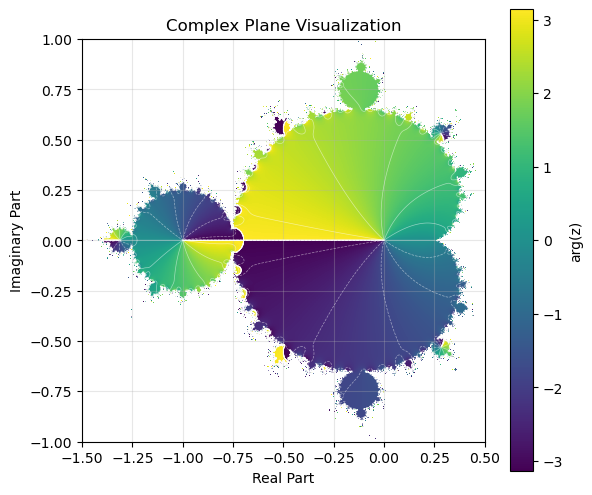

In [ ]:
Z, fig = plot_mandelbrot(plot_variable="phase", plot_contour=True, x_lim=(-1.5, 0.5), y_lim=(-1, 1), n_iter=51)

/tmp/ipykernel_307032/942432918.py:39: RuntimeWarning: overflow encountered in multiply
  Z = Z * Z + Z_C
/tmp/ipykernel_307032/942432918.py:39: RuntimeWarning: invalid value encountered in multiply
  Z = Z * Z + Z_C
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/matplotlib/contour.py:1339: RuntimeWarning: overflow encountered in scalar subtract
  eps = - (self.zmax - self.zmin) * 1e-15
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


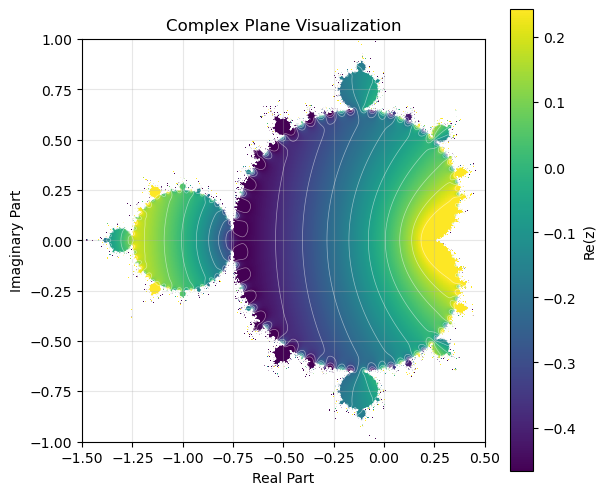

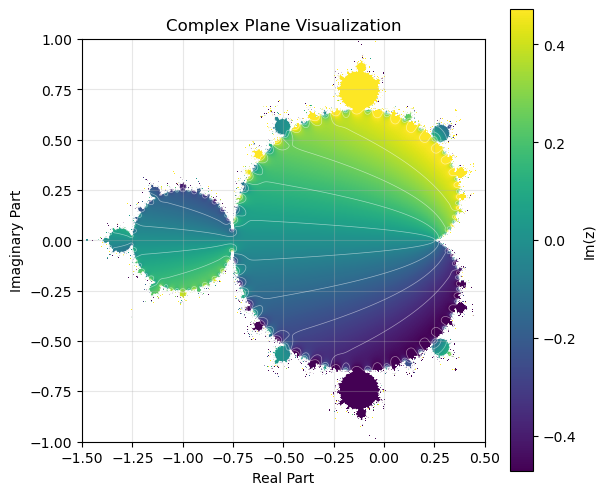

In [ ]:
Z, fig = plot_mandelbrot(plot_variable="real", plot_contour=True, x_lim=(-1.5, 0.5), y_lim=(-1, 1), n_iter=51)
Z, fig = plot_mandelbrot(plot_variable="imag", plot_contour=True, x_lim=(-1.5, 0.5), y_lim=(-1, 1), n_iter=51)